## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC
from scipy import stats
import pickle

## Config

In [2]:
RETRAIN_SVM = False
SVM_BEST_PARAMS = {
    "C": 100,
    "kernel": "poly"
}
SVM_MODEL_FILE = "refitted_svm.pickle"

RETRAIN_LOGREG = False
LOGREG_BEST_PARAMS = {
    "C": 0.1,
    "penalty": "l1",
    "solver": "saga"
}
LOGREG_MODEL_FILE = "refitted_log_reg.pickle"
IMG_SIZE = 28

## Set seed

In [3]:
np.random.seed(123)

## Data processing

In [4]:
mnist = pd.read_csv("mnist.csv").values

In [5]:
digits = mnist[:, 1:]
labels = mnist[: , 0]

In [6]:
var_thr = VarianceThreshold(threshold = 0)
clean_digits = var_thr.fit_transform(digits)
scaler = StandardScaler()  
scaled_digits = scaler.fit_transform(clean_digits)
scaled_with_label = np.column_stack((labels, scaled_digits))

In [7]:
test_indices = np.random.choice(scaled_with_label.shape[0], 5000, replace=False)
test_with_label = scaled_with_label[test_indices]
train_with_label = np.delete(scaled_with_label, test_indices, axis=0)

In [8]:
train_x = train_with_label[:, 1:]
train_y = train_with_label[:, 0]
test_x = test_with_label[:, 1:]
test_y = test_with_label[:, 0]

## Train models

In [9]:
if RETRAIN_SVM:
    svm = SVC(**SVM_BEST_PARAMS)
    svm.fit(train_x, train_y, verbose=1)
    with open(SVM_MODEL_FILE, "wb") as f:
        pickle.dump(svm, f)

In [10]:
if RETRAIN_LOGREG:
    log_reg = LogisticRegression(**LOGREG_BEST_PARAMS, verbose=1, n_jobs=-1)
    log_reg.fit(train_x, train_y)
    with open(LOGREG_MODEL_FILE, "wb") as f:
        pickle.dump(log_reg, f)

### Load models

In [11]:
with open(SVM_MODEL_FILE, "rb") as f:
    svm = pickle.load(f)

In [12]:
with open(LOGREG_MODEL_FILE, "rb") as f:
    log_reg = pickle.load(f)

## Predict

In [13]:
svm_pred = svm.predict(test_x)

In [14]:
log_reg_pred = log_reg.predict(test_x)

## Analyses

In [15]:
print("Logistic regression")
print(classification_report(test_y, log_reg_pred, digits=4))
print(f"Accuracy: {accuracy_score(test_y, log_reg_pred)}")

Logistic regression
              precision    recall  f1-score   support

         0.0     0.9283    0.9749    0.9510       478
         1.0     0.9235    0.9628    0.9427       564
         2.0     0.9437    0.8685    0.9046       502
         3.0     0.8876    0.8876    0.8876       516
         4.0     0.9066    0.9421    0.9240       484
         5.0     0.8627    0.8664    0.8645       464
         6.0     0.9397    0.9596    0.9496       520
         7.0     0.9276    0.9202    0.9238       501
         8.0     0.8980    0.8589    0.8780       482
         9.0     0.9093    0.8814    0.8951       489

    accuracy                         0.9132      5000
   macro avg     0.9127    0.9122    0.9121      5000
weighted avg     0.9132    0.9132    0.9129      5000

Accuracy: 0.9132


In [16]:
print("Support Vector machine")
print(classification_report(test_y, svm_pred, digits=4))
print(f"Accuracy: {accuracy_score(test_y, svm_pred)}")

Support Vector machine
              precision    recall  f1-score   support

         0.0     0.9896    1.0000    0.9948       478
         1.0     0.9982    0.9982    0.9982       564
         2.0     1.0000    0.9880    0.9940       502
         3.0     0.9961    0.9981    0.9971       516
         4.0     1.0000    1.0000    1.0000       484
         5.0     0.9978    0.9935    0.9957       464
         6.0     1.0000    0.9962    0.9981       520
         7.0     0.9960    0.9980    0.9970       501
         8.0     0.9918    1.0000    0.9959       482
         9.0     0.9959    0.9939    0.9949       489

    accuracy                         0.9966      5000
   macro avg     0.9966    0.9966    0.9966      5000
weighted avg     0.9966    0.9966    0.9966      5000

Accuracy: 0.9966


In [17]:
confusion_matrix(test_y, log_reg_pred)

array([[466,   0,   2,   0,   1,   4,   5,   0,   0,   0],
       [  0, 543,   0,   4,   1,   4,   2,   2,   8,   0],
       [  4,   9, 436,  10,  13,   3,   8,   7,  12,   0],
       [  3,   5,   8, 458,   0,  21,   1,   5,  10,   5],
       [  3,   6,   1,   0, 456,   1,   3,   2,   1,  11],
       [  7,   2,   2,  26,   2, 402,   8,   0,  12,   3],
       [  6,   2,   3,   0,   3,   7, 499,   0,   0,   0],
       [  1,   5,   7,   1,   4,   3,   0, 461,   2,  17],
       [  7,  14,   3,   9,   1,  19,   5,   3, 414,   7],
       [  5,   2,   0,   8,  22,   2,   0,  17,   2, 431]])

In [18]:
confusion_matrix(test_y, svm_pred)

array([[478,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 563,   0,   0,   0,   0,   0,   0,   1,   0],
       [  1,   0, 496,   1,   0,   0,   0,   1,   2,   1],
       [  0,   0,   0, 515,   0,   0,   0,   0,   0,   1],
       [  0,   0,   0,   0, 484,   0,   0,   0,   0,   0],
       [  1,   0,   0,   1,   0, 461,   0,   0,   1,   0],
       [  1,   1,   0,   0,   0,   0, 518,   0,   0,   0],
       [  1,   0,   0,   0,   0,   0,   0, 500,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 482,   0],
       [  1,   0,   0,   0,   0,   1,   0,   1,   0, 486]])

In [19]:
def show_n_misclassified(true_y, pred_y, cols=5, savefig=False, filename="plot.png"):
    wrongly_classified = np.arange(0, len(true_y))[true_y != pred_y]
    rows = len(wrongly_classified) // cols + 1
    fig = plt.figure(figsize=(20, 20))
    gs1 = gridspec.GridSpec(rows, cols)

    for idx, error in enumerate(wrongly_classified):
        ax = plt.subplot(gs1[idx])
        ax.imshow(digits[test_indices[error]].reshape(IMG_SIZE, IMG_SIZE))

        ax.axis('off')
        ax.text(0.5,-0.1, f"True Label: {true_y[error]}, Pred Label: {pred_y[error]}", size=10, ha="center", 
             transform=ax.transAxes)

    if savefig:
        plt.savefig(filename, dpi=100)
    plt.show()


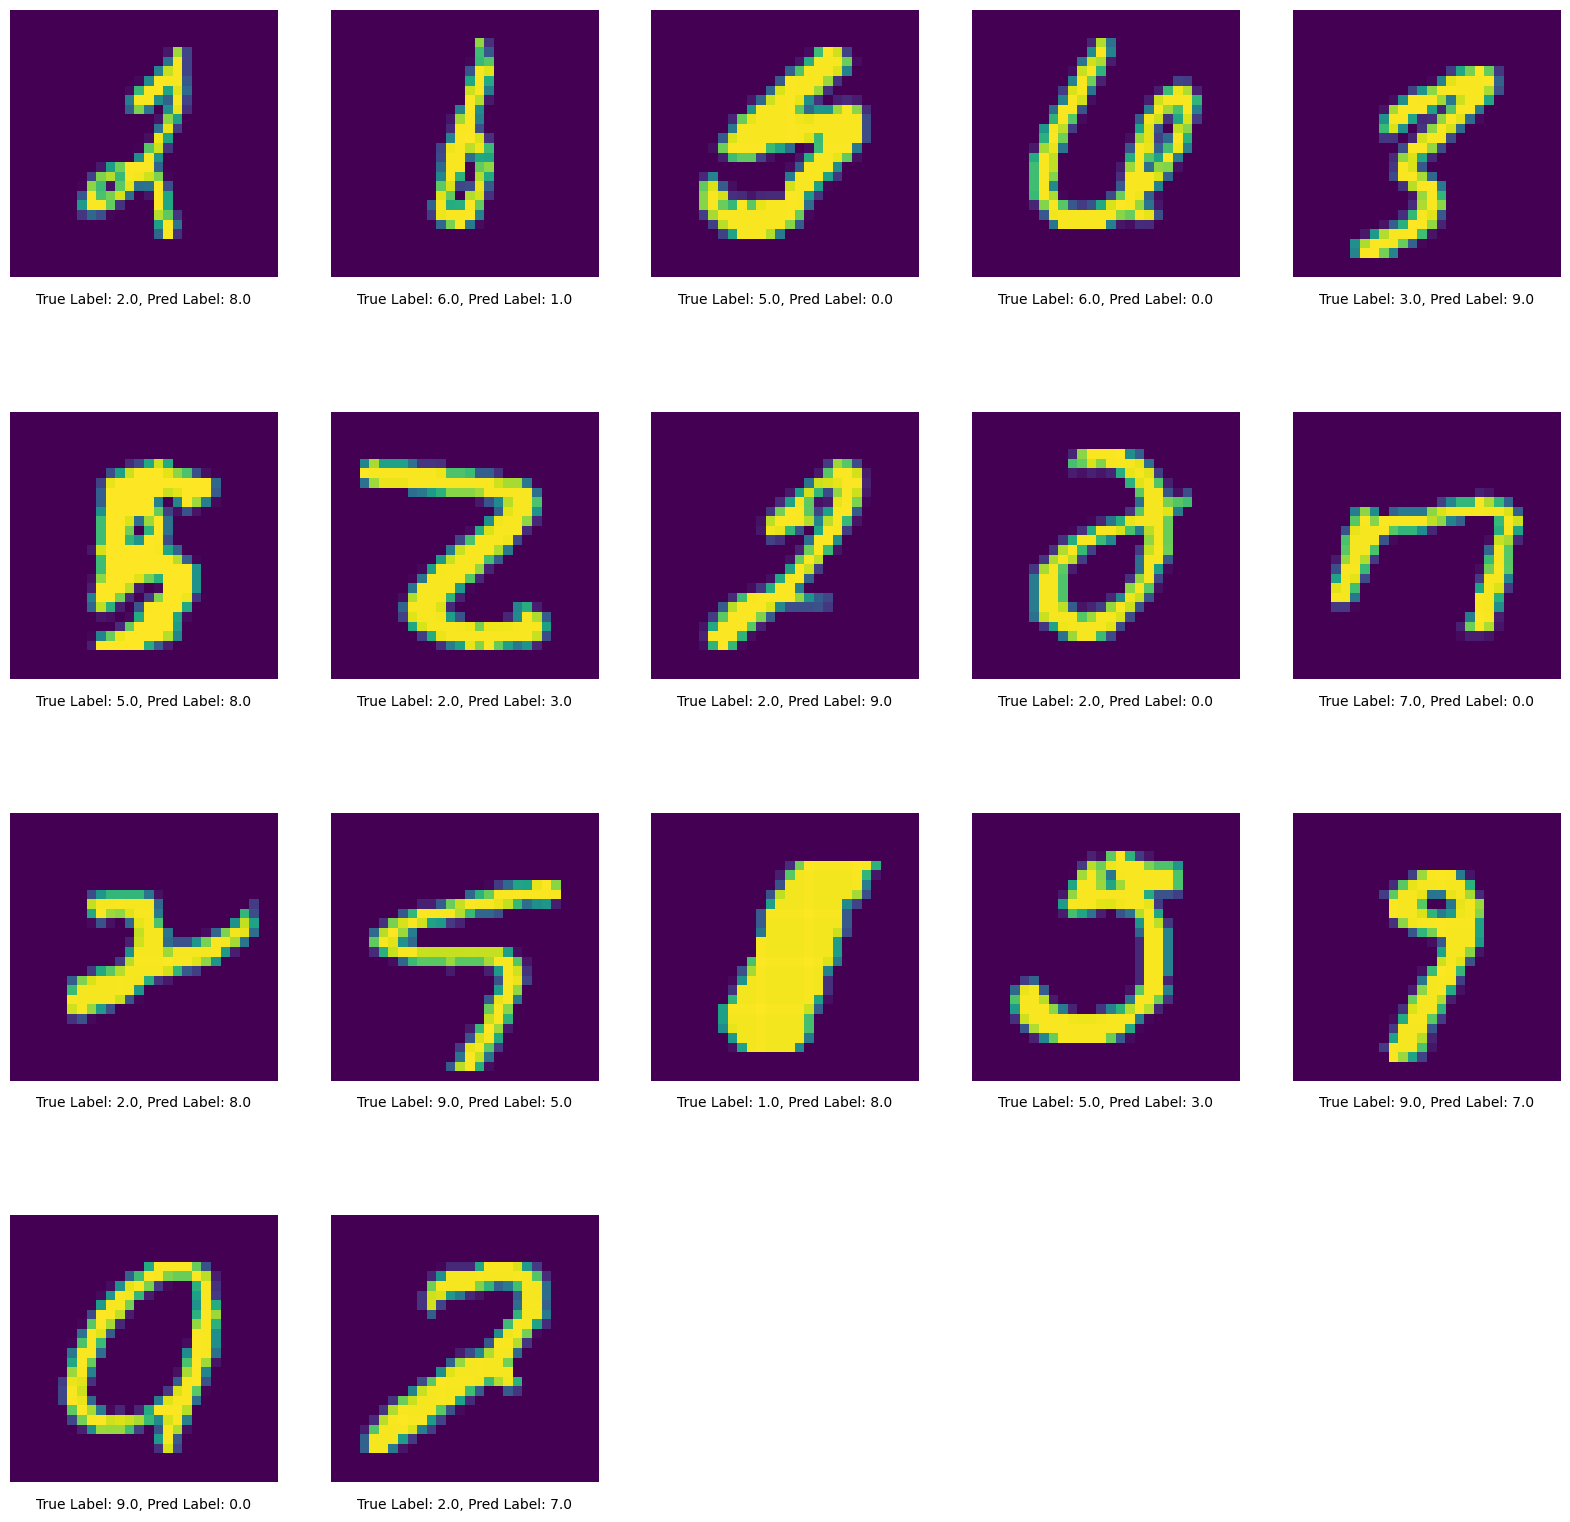

In [21]:
show_n_misclassified(test_y, svm_pred, savefig=True, filename="misclassified_svm.png")

In [28]:
show_n_misclassified(test_y, log_reg_pred, 20, savefig=True, filename="miscoded_logreg.png")